#KNN_Digit_Recognizer

In [11]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

#From `../train.csv` and `../test.csv` read data to numpy arrays.
#Print data to check the shape

In [14]:
data_dir = "../input/"

# load csv files to numpy arrays
def load_data(data_dir, train_row):
    train = pd.read_csv(data_dir + "train.csv")
    print(train.shape)
#     print(train.head())
#     print(train.shape)
#     print(train.head())
#     print(train[0:])
    X_train = train.values[0:train_row,1:] # pixe
    y_train = train.values[0:train_row,0] # label
    
    
    Pred_test = pd.read_csv(data_dir + "test.csv").values  
#     print(Pred_test.shape)
#     print(pd.read_csv(data_dir + "test.csv").head())
    return X_train, y_train, Pred_test

train_row = 5000 
Origin_X_train, Origin_y_train, Origin_X_test = load_data(data_dir, train_row)


(42000, 785)


In [15]:
print(Origin_X_train.shape, Origin_y_train, Origin_X_test.shape)
print(Origin_X_train)

(5000, 784) [1 0 1 ... 8 7 9] (28000, 784)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


8


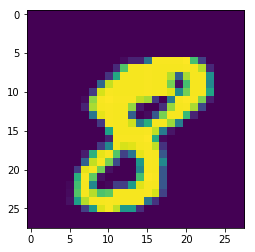

In [25]:
import matplotlib
import matplotlib.pyplot as plt

row = 10

print (Origin_y_train[row])

plt.imshow(Origin_X_train[row].reshape((28,28)))
plt.show()

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


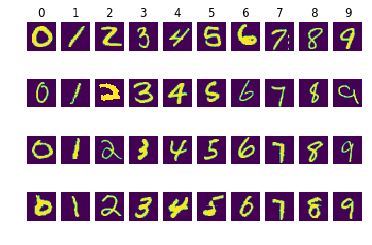

In [35]:
classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
rows = 4

print(classes)
for y, cls in enumerate(classes):
    idxs = np.nonzero([i == y for i in Origin_y_train])
    idxs = np.random.choice(idxs[0], rows)
    
    for i, idx in enumerate(idxs):
        plt_idx = i * len(classes) + y + 1
        plt.subplot(rows, len(classes), plt_idx)
        plt.imshow(Origin_X_train[idx].reshape((28,28)))
        plt.axis("off")
        if i == 0:
            plt.title(cls)
            
plt.show()            

#test --> 20% (8400)，train --> 80%(33600)

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_vali, y_train, y_vali = train_test_split(Origin_X_train,
                                                   Origin_y_train,
                                                   test_size = 0.2,
                                                   random_state = 0)

print(X_train.shape, X_vali.shape, y_train.shape, y_vali.shape)

(4000, 784) (1000, 784) (4000,) (1000,)


In [38]:
import time
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

ans_k = 0

k_range = range(1, 8)
scores = []


for k in k_range:
    print("k = " + str(k) + " begin ")
    start = time.time()
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_vali)
    accuracy = accuracy_score(y_vali,y_pred)
    scores.append(accuracy)
    end = time.time()
    print(classification_report(y_vali, y_pred))  
    print(confusion_matrix(y_vali, y_pred))  
    
    print("Complete time: " + str(end-start) + " Secs.")

k = 1 begin 
             precision    recall  f1-score   support

          0       0.96      0.98      0.97       103
          1       0.90      0.98      0.94       100
          2       0.97      0.88      0.92       104
          3       0.89      0.93      0.91       100
          4       0.93      0.93      0.93       107
          5       0.95      0.88      0.92        94
          6       0.93      0.97      0.95        93
          7       0.92      0.94      0.93       116
          8       0.89      0.85      0.87        85
          9       0.85      0.85      0.85        98

avg / total       0.92      0.92      0.92      1000

[[101   0   0   1   0   0   1   0   0   0]
 [  0  98   0   1   0   0   0   0   0   1]
 [  0   1  91   2   2   0   1   2   3   2]
 [  0   0   1  93   0   1   0   1   3   1]
 [  0   0   0   0  99   0   1   0   0   7]
 [  0   2   1   3   0  83   3   0   2   0]
 [  1   1   0   0   0   0  90   0   1   0]
 [  0   4   0   0   1   0   0 109   0   2]
 [  

[0.919, 0.906, 0.92, 0.915, 0.915, 0.914, 0.915]


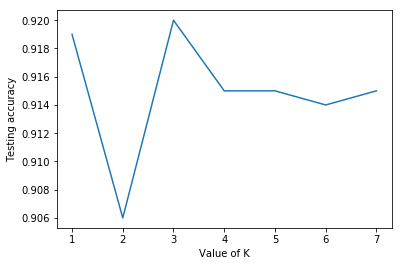

In [39]:
print(scores)
plt.plot(k_range,scores)
plt.xlabel('Value of K')
plt.ylabel('Testing accuracy')
plt.show()

In [40]:
k = 3

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(Origin_X_train,Origin_y_train)
y_pred = knn.predict(Origin_X_test[:300])

6


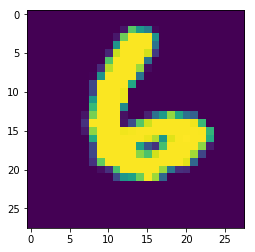

In [54]:
print(y_pred[266])
plt.imshow(Origin_X_test[266].reshape((28,28)))
plt.show()

In [55]:
print(len(y_pred))

pd.DataFrame({"ImageID":list(range(1,len(y_pred)+1)),"Label":y_pred}).to_csv('Digit_Recogniser_Result.csv', index=False,header=True)

300
